![](imagenes/UC_FMRI.jpg)

---

---

***Andres Eduardo Aracena Rangel***

*Estudiante del programa del Magister en Física Médica*

---

---

El siguiente Script de Python forma parte del trabajo especial de grado.

Profesor Guía:

*PhD María Daniela Cornejo*

---

---

Imagenes de fMRI extraidas de OpenNeuro:

- [ds004101](https://openneuro.org/datasets/ds004101/versions/1.0.1)

---

---

&nbsp;
Con referencia:

- [Pagina oficial NIbabel](https://nipy.org/nibabel/index.html) 
- [Pagina oficial JSON](https://www.json.org/)

Adquisisción de cortes:

- Poldrack, R. A., Mumford, J. A., and Nichols, T. E. (2011). Handbook of functional MRI data analysis. Cambridge University Press.


---

---

Imágenes realizadas por el autor del script, con apoyo de imagen 3D de corte sagital del cerebro del programa Microsoft PowerPoint.

---

---


 # Orden de adquisición de neuroimágenes y función 'order_slice'

Para la adquisición del orden de adquisición de la imagen, extraemos algunas variables del archivo '.json' que se encuentra en el mismo repositorio de la imagen funcional. Como lo describe su página oficial, un archivo JSON es la abreviatura de: notación de objetos de JavaScript (*JavaScript Object Notation*), el cual es un formato ligero de intercambio de datos. Es fácil para los humanos leer y escribir. Es fácil para las máquinas analizar y generar. JSON es un formato de texto que es completamente independiente del lenguaje pero utiliza convenciones que son familiares para los programadores de la familia de lenguajes C, incluidos C, C++, C#, Java, JavaScript, Perl, Python y muchos otros. Estas propiedades hacen de JSON un lenguaje de intercambio de datos ideal.

JSON se basa en dos estructuras:

- Una colección de pares de nombre/valor. En varios idiomas, esto se realiza como un objeto , registro, estructura, diccionario, tabla hash, lista con clave o matriz asociativa.
- Una lista ordenada de valores. En la mayoría de los lenguajes, esto se realiza como una matriz , un vector, una lista o una secuencia.

Estas son estructuras de datos universales; prácticamente todos los lenguajes de programación modernos los admiten de una forma u otra.

**JSON en Python**

JSON puede almacenar listas, booleanos, números, tuplas y diccionarios. Pero para guardarse en un archivo, todas estas estructuras deben reducirse a cadenas (cadenas que se puede leer o escribir en un archivo). Python tiene un módulo JSON que ayudará a convertir las estructuras de datos en cadenas JSON. Importamos el módulo

    import json

Para convertir el diccionario de Python en una cadena JSON que se puede escribir en un archivo, usamos

    json_string = json.dumps(datastore)

Para tomar una cadena JSON y convertirla en una estructura de diccionario:

    datastore = json.load(json_string)

# Importamos librerias


In [1]:
import time # medir el tiempo de ejecución de nuestros programas
start = time.process_time()
inicio = time.time()

In [2]:
import os # Módulo que permite acceder a funcionalidades dependientes del Sistema Operativo
from os.path import join as opj # Método que concatena varios componentes de ruta con exactamente un separador de directorio(‘/’)

from IPython.display import display, Image #IPython proporciona una rica arquitectura para la computación interactiva

import pandas as pd # librería especializada en el manejo y análisis de estructuras de datos.
import json # Módulo para trabajar con datos JSON

In [3]:
%matplotlib inline

# Definimos Parametros 

In [4]:
'''
Ruta del directorio de la data
'''
path_data = '/home/aracena/data/ds004101/'

'''
Ruta donde reposa el archivo.json
'''
path_json = opj(path_data,'sub-09114','ses-1pre','func')

'''
Ruta donde se guardaran los resultados
'''
path_expe = '/home/aracena/thesis_ds004101/00_fase0_tips_nibabel_funciones/'

path_output = opj(path_expe,'00_00_archivo_json_and_func_ordenslice', 'output')

# Crear la(s) carpeta(s) de salida
os.system('mkdir -p %s'%path_output)

'''
Ruta donde reposan las imagenes de referencia de orden de adquisición de imagenes
'''

path_ref = opj(path_expe, '00_00_archivo_json_and_func_ordenslice','imagenes')

# Cargamos el archivo '.json'

Junto al archivo de la imagen funcional, encontramos un archivo '.json' el cual contiene la información de adquisición de la imagen

In [5]:
json_arch = opj(path_json,'sub-09114_ses-1pre_task-rest_bold.json')

In [6]:
with open(json_arch, 'rt') as fp:
    task_info = json.load(fp)

La información cargada del archivo '.json' esta en forma de diccionario, comprobemos

In [7]:
print(task_info)

{'TaskName': 'rest', 'MagneticFieldStrength': 3, 'Manufacturer': 'Siemens', 'ManufacturersModelName': 'Verio', 'BodyPartExamined': 'HEAD', 'PatientPosition': 'HFS', 'MRAcquisitionType': '2D', 'ScanningSequence': 'EP', 'SequenceVariant': 'SK', 'ScanOptions': 'FS', 'ImageType': ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'MOSAIC'], 'SliceThickness': 3, 'SpacingBetweenSlices': 3.75, 'EchoTime': 0.03, 'RepetitionTime': 2.4, 'FlipAngle': 90, 'PercentPhaseFOV': 100, 'PhaseEncodingSteps': 64, 'AcquisitionMatrixPE': 64, 'ReconMatrixPE': 64, 'EffectiveEchoSpacing': 0.000510004, 'TotalReadoutTime': 0.0321303, 'PhaseEncodingDirection': 'i', 'SliceTiming': [1.205, 0, 1.2725, 0.0675, 1.3375, 0.135, 1.405, 0.2, 1.4725, 0.2675, 1.54, 0.335, 1.605, 0.4025, 1.6725, 0.4675, 1.74, 0.535, 1.8075, 0.6025, 1.875, 0.67, 1.94, 0.7375, 2.0075, 0.8025, 2.075, 0.87, 2.1425, 0.9375, 2.2075, 1.005, 2.275, 1.07, 2.3425, 1.1375], 'InPlanePhaseEncodingDirectionDICOM': 'ROW', 'Instructions': "Lie still with eyes closed, don't 

In [8]:
type(task_info)

dict

# Creamos un DataFrame (DF) con la información del archivo '.json'

## Creamos una lista con las claves del diccionario

In [9]:
list_dic = list(task_info.keys())

In [10]:
print(list_dic)

['TaskName', 'MagneticFieldStrength', 'Manufacturer', 'ManufacturersModelName', 'BodyPartExamined', 'PatientPosition', 'MRAcquisitionType', 'ScanningSequence', 'SequenceVariant', 'ScanOptions', 'ImageType', 'SliceThickness', 'SpacingBetweenSlices', 'EchoTime', 'RepetitionTime', 'FlipAngle', 'PercentPhaseFOV', 'PhaseEncodingSteps', 'AcquisitionMatrixPE', 'ReconMatrixPE', 'EffectiveEchoSpacing', 'TotalReadoutTime', 'PhaseEncodingDirection', 'SliceTiming', 'InPlanePhaseEncodingDirectionDICOM', 'Instructions']


In [11]:
type(task_info['TaskName'])

str

In [12]:
type(task_info['SliceTiming'])

list

In [13]:
lista_json = []
for i, js in enumerate(list_dic):
    # Como los valores de las claves la quiero visualizar en columnas, debo verificar que el
    # valor de la clave no sea una lista.
    tipo = type(task_info[js])
    if tipo == list:
        #print(tipo)
        A = str(task_info[js])# convertimos en string
        val = ''.join(A)  # unimos elemenros de la lista, convirtiendo en 1 dimension
        lista_json.append(val)
    else:
        #print('string o int')
        lista_json.append((task_info[js]))
    
# Creamos DF del archivo '.json'
df_json = pd.DataFrame(lista_json)
df_json.columns = [('IRMf '+ lista_json[0])]
df_json.index = [list_dic]

In [14]:
pd.set_option('display.max_colwidth', 50)
display(df_json)

,IRMf rest
TaskName,rest
MagneticFieldStrength,3
Manufacturer,Siemens
ManufacturersModelName,Verio
BodyPartExamined,HEAD
PatientPosition,HFS
MRAcquisitionType,2D
ScanningSequence,EP
SequenceVariant,SK
ScanOptions,FS


# Orden de adquisición de los slices

Casi todos los datos de resonancia magnética funcional se recopilan mediante adquisición de resonancia magnética bidimensional, en la que los datos se adquieren a un corte a la vez. Los dos métodos más utilizados para crear volúmenes son la adquisición de cortes secuenciales e intercalados. 

La adquisición secuencial de cortes adquiere cada corte adyacente de forma consecutiva, ya sea de abajo hacia arriba (ascendente) o de arriba hacia abajo (ascendente), como se ilustra en la figura dinámica. Cada método secuencial lo denominaremos:  'adquisición de cortes secuencial ascendente' y 'adquisición de cortes secuencial descendente' y ambos se ilustran en la figura dinámica izquierda y derecha respectivamente.

![](imagenes/GIF_SECUENCIAL.gif)

La adquisición de cortes intercalados adquiere cada dos cortes y luego llena los espacios en el segundo paso. Como se ilustra en la figura dinámica izquierda, se adquieren cada dos slices secuencialmente, de modo que se adquieren la mitad de los slices (por ejemplo, los slices pares) seguidas por la otra mitad (por ejemplo, las slices impares), llamaremos a este método de adquisición: 'adquisición de cortes intercalados inferior/pares'; por otro lado, en la figura dinámica derecha, se adquieren cada dos slices secuencialmente, de modo que se adquieren la mitad de los slices (por ejemplo, los slices impares) seguidas por la otra mitad (los slices pares), llamaremos a este método de adquisición: 'adquisición de cortes intercalados inferior+1/impares'

![](imagenes/GIF_INTERCALADO.gif)

El uso de la adquisición 2D significa que los datos en diferentes partes de la imagen se adquieren en tiempos sistemáticamente diferentes, con estas diferencias que van hasta varios segundos (dependiendo del tiempo de repetición, o TR de la secuencia de pulso)

Para extraer el orden de adquisón de los slices, de la información sumistrada por el archivo '.json' debemos trabajar con los datos de 'RepetitionTime' y 'SliceTiming'

Orden de adquisición de cortes intercalados inferior+1/impares: 

[1.205, 0, 1.2725, 0.0675, 1.3375, 0.135, 1.405, 0.2, 1.4725, 0.2675, 1.54, 0.335, 1.605, 0.4025, 1.6725, 0.4675, 1.74, 0.535, 1.8075, 0.6025, 1.875, 0.67, 1.94, 0.7375, 2.0075, 0.8025, 2.075, 0.87, 2.1425, 0.9375, 2.2075, 1.005, 2.275, 1.07, 2.3425, 1.1375]


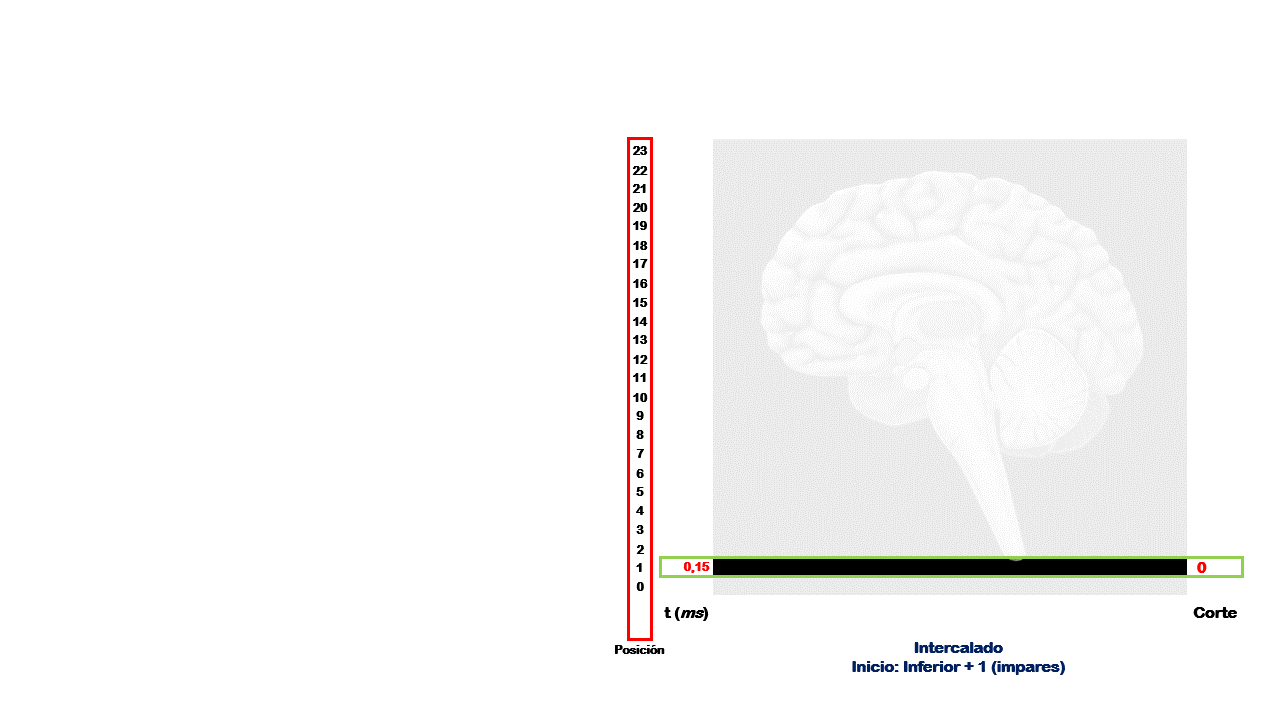

In [15]:
'''
Creamos una lista de las imagenes de referencia de adquisición de cortes
'''
lista_imagenes = [opj(path_ref,'GIF_SECUENCIAL_ASCENDENTE.gif'),
                  opj(path_ref,'GIF_SECUENCIAL_DESCENDENTE.gif'),
                  opj(path_ref,'GIF_INTERCALADO_PAR.gif'),
                  opj(path_ref,'GIF_INTERCALADO_IMPAR.gif')]

'''
Extraemos información del arhivo .json
'''
# tiempo de repeticion
TR = task_info['RepetitionTime']
# tiempo de adquisión de cortes
slice_timing = task_info['SliceTiming']

'''
Procesamos data extraida del archivo .json
'''
# Número de slices
number_of_slices = len(slice_timing)
# Tiempo en adquirir primer corte
time_first = TR/number_of_slices
# Valor mínimo de slice_timing
mini = min(slice_timing)
# Valor máximo de slice_timing
maxi = max(slice_timing)
# Primer valor de slice_timing
prim = slice_timing[0]
# Segundo valor de slice_timing
segu = slice_timing[1]


if prim == mini:
    if segu == mini+time_first:
        print('Orden de adquisición de cortes secuenciales ascendente')
        slice_order = list(range(1, number_of_slices+1, 1))
        print(slice_timing)
        display(Image(lista_imagenes[3]))
    else:
        print('Orden de adquisición de cortes intercalados inferior/pares')
        slice_order = list(range(1, number_of_slices+1, 2)) + list(range(2, number_of_slices+1, 2))
        print(slice_timing)
        display(Image(lista_imagenes[2]))
else:
    if segu == maxi - time_first:
        print('Orden de adquisición de cortes secuenciales descendente')
        slice_order = list(range(snumber_of_slices,0 , -1))
        print(slice_timing)
        display(Image(lista_imagenes[1]))
    else:
        print('Orden de adquisición de cortes intercalados inferior+1/impares: \n')
        slice_order = list(range(2, number_of_slices+1, 2))+list(range(1, number_of_slices+1, 2))
        print(slice_timing)
        display(Image(lista_imagenes[3]))

# Creación de la función 'order_slice'

In [16]:
'''
Funcion para extraer el orden de adquisión de los cortes de la imagen.

Inputs:

- json_arch: archivo '.json'

Output:

- slice_order: orden de adqusión de los cortes
- TR: tiempo de repetición
- number_of_slices: número de slices
- df_json: DF con la información del archivo '.json'
'''
 
def order_slice(json_arch):
    import json
    from IPython.display import Image, display
    import pandas as pd
    
    '''
    Cargamos el archivo '.json'
    '''
    with open(json_arch, 'rt') as fp:
        task_info = json.load(fp)
    
    '''
    Creamos una lista de las imágenes de referencia de adquisición de cortes
    '''
    lista_imagenes = [opj(path_ref,'SECUENCIAL_ASCENDENTE.png'),
                      opj(path_ref,'SECUENCIAL_DESCENDENTE.png'),
                      opj(path_ref,'INTERCALADO_PAR.png'),
                      opj(path_ref,'INTERCALADO_IMPAR.png')]

    '''
    Extraemos información del arhivo .json
    '''
    # tiempo de repeticion
    TR = task_info['RepetitionTime']
    # tiempo de adquisión de cortes
    slice_timing = task_info['SliceTiming']

    '''
    Procesamos data extraida del archivo .json
    '''
    # Número de slices
    number_of_slices = len(slice_timing)
    # Tiempo en adquirir primer corte
    time_first = TR/number_of_slices
    # Valor mínimo de slice_timing
    mini = min(slice_timing)
    # Valor máximo de slice_timing
    maxi = max(slice_timing)
    # Primer valor de slice_timing
    prim = slice_timing[0]
    # Segundo valor de slice_timing
    segu = slice_timing[1]

    if prim == mini:
        if segu == mini+time_first:
            print('Orden de adquisición de cortes secuenciales ascendente')
            slice_order = list(range(1, number_of_slices+1, 1))
            print(slice_timing)
            imagen_ref = lista_imagenes[3]
        else:
            print('Orden de adquisición de cortes intercalados inferior/pares')
            slice_order = list(range(1, number_of_slices+1, 2)) + list(range(2, number_of_slices+1, 2))
            print(slice_timing)
            imagen_ref = lista_imagenes[2]
    else:
        if segu == maxi - time_first:
            print('Orden de adquisición de cortes secuenciales descendente')
            slice_order = list(range(snumber_of_slices,0 , -1))
            print(slice_timing)
            imagen_ref = lista_imagenes[1]
        else:
            print('Orden de adquisición de cortes intercalados inferior+1/impares: \n')
            slice_order = list(range(2, number_of_slices+1, 2))+list(range(1, number_of_slices+1, 2))
            print(slice_timing)
            imagen_ref = lista_imagenes[3]
    
    '''
    Creamos un DataFrame (DF) con la información del archivo '.json'
    '''
    list_dic = list(task_info.keys())
    lista_json = []
    for i, js in enumerate(list_dic):
        # Como los valores de las claves la quiero visualizar en columnas, debo verificar que el
        # valor de la clave no sea una lista.
        tipo = type(task_info[js])
        if tipo == list:
            A = str(task_info[js])# convertimos en string
            val = ''.join(A)  # unimos elemenros de la lista, convirtiendo en 1 dimension
            lista_json.append(val)
        else:
            lista_json.append((task_info[js]))

    # Creamos DF del archivo '.json'
    df_json = pd.DataFrame(lista_json)
    df_json.columns = [('IRMf '+ lista_json[0])]
    df_json.index = [list_dic]
    
    return slice_order,TR, number_of_slices, df_json, imagen_ref

## Ejecutamos función

Orden de adquisición de cortes intercalados inferior+1/impares: 

[1.205, 0, 1.2725, 0.0675, 1.3375, 0.135, 1.405, 0.2, 1.4725, 0.2675, 1.54, 0.335, 1.605, 0.4025, 1.6725, 0.4675, 1.74, 0.535, 1.8075, 0.6025, 1.875, 0.67, 1.94, 0.7375, 2.0075, 0.8025, 2.075, 0.87, 2.1425, 0.9375, 2.2075, 1.005, 2.275, 1.07, 2.3425, 1.1375]

Tiempo de repetición (TR)=  2.4

Número de cortes =  36


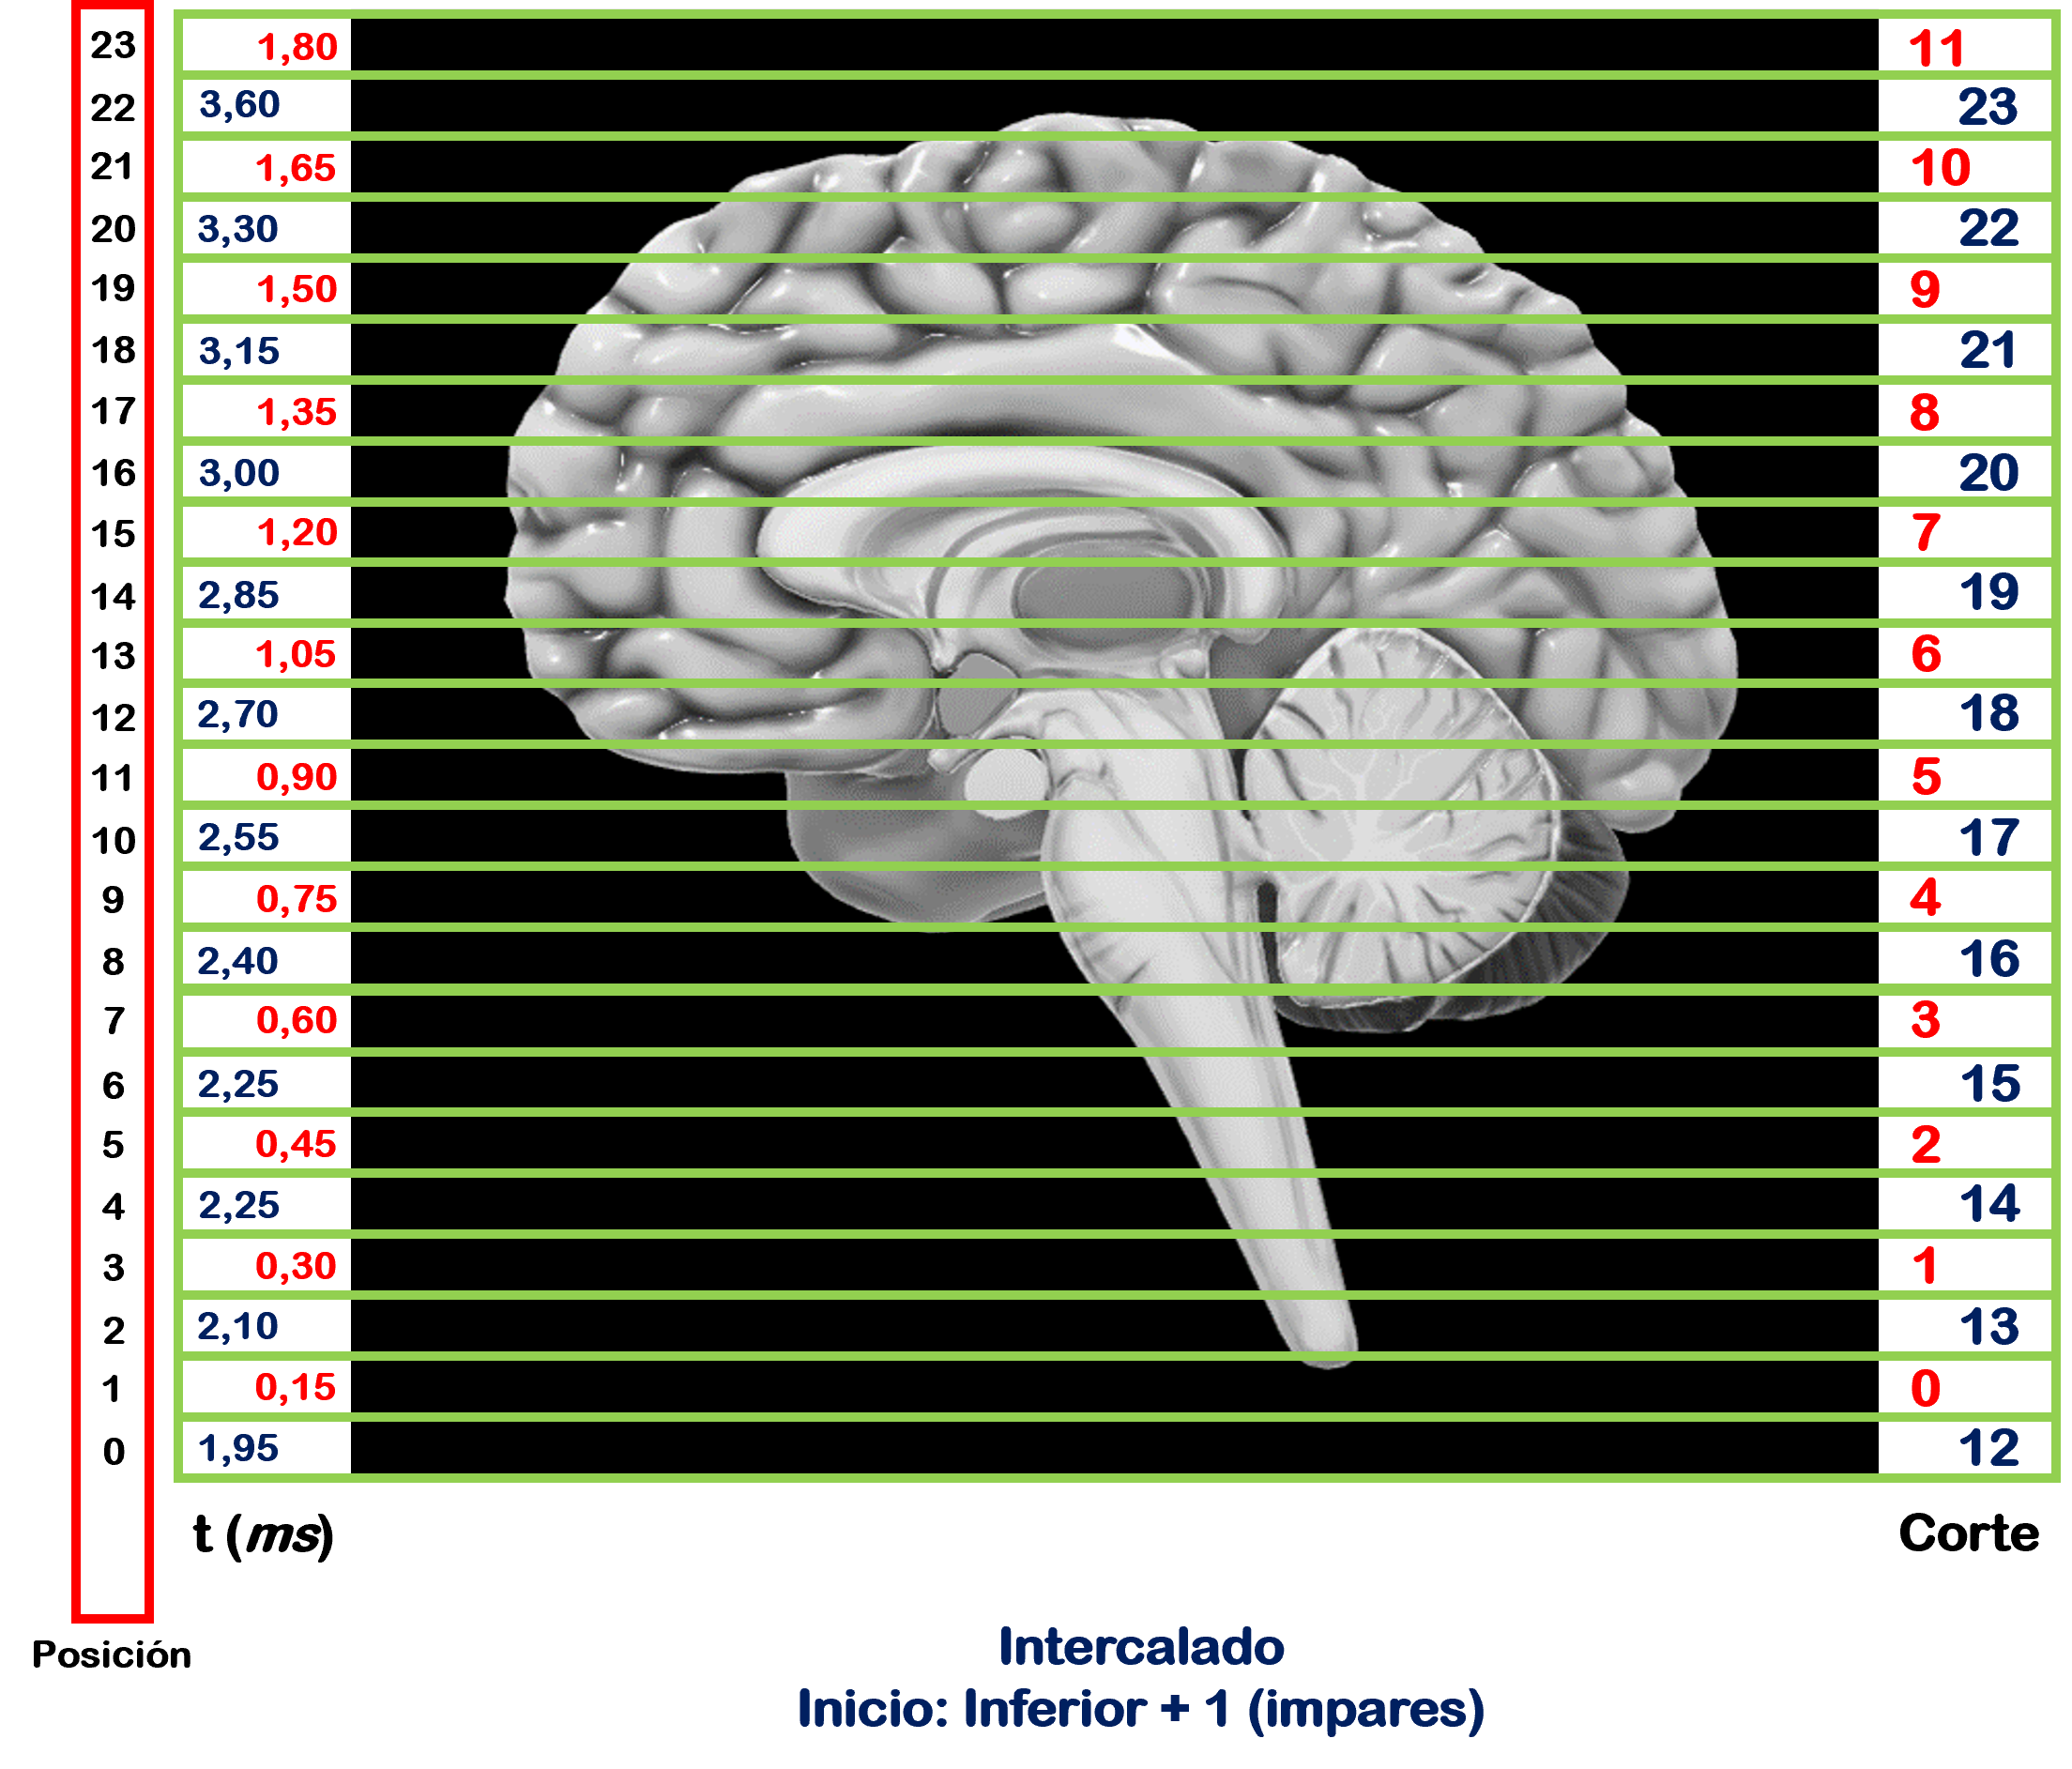

,IRMf rest
TaskName,rest
MagneticFieldStrength,3
Manufacturer,Siemens
ManufacturersModelName,Verio
BodyPartExamined,HEAD
PatientPosition,HFS
MRAcquisitionType,2D
ScanningSequence,EP
SequenceVariant,SK
ScanOptions,FS


In [17]:
datos_json_img = order_slice(json_arch= json_arch)
print('\nTiempo de repetición (TR)= ', datos_json_img[1])
print('\nNúmero de cortes = ', datos_json_img[2])
display(Image(datos_json_img[4], width=400, height=400))
display(datos_json_img[3])

# Tiempo de ejecución

In [18]:
fin = time.time()
end = time.process_time()
tiempo = fin - inicio
tiempo2 = end - start

print('--------------------------------------')
print('tiempo de ejecución\n\n', round(tiempo,3), 'seg\n', round(tiempo/60,3), 'min')     
print('--------------------------------------')
print('tiempo de ejecución del sistema y CPU\n\n', round(tiempo2,3), 'seg\n', round(tiempo2/60,3), 'min')
print('--------------------------------------')

--------------------------------------
tiempo de ejecución

 2.266 seg
 0.038 min
--------------------------------------
tiempo de ejecución del sistema y CPU

 1.786 seg
 0.03 min
--------------------------------------


# Fin